In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
data = yf.download('META', start='2017-01-01', end='2023-12-07')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400
...,...,...,...,...,...,...
2023-11-30,331.890015,333.500000,322.399994,327.149994,327.149994,23146400
2023-12-01,325.480011,326.859985,320.760010,324.820007,324.820007,15264700
2023-12-04,317.290009,320.859985,313.660004,320.019989,320.019989,19037100


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [ ]:
data = data['Adj Close']

In [ ]:
data

Date
2017-01-03    116.860001
2017-01-04    118.690002
2017-01-05    120.669998
2017-01-06    123.410004
2017-01-09    124.900002
                 ...    
2023-11-30    327.149994
2023-12-01    324.820007
2023-12-04    320.019989
2023-12-05    318.290009
2023-12-06    317.450012
Name: Adj Close, Length: 1744, dtype: float64

<Axes: xlabel='Date'>

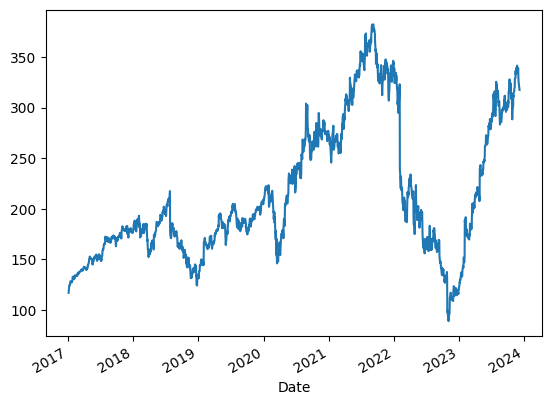

In [ ]:
data.plot()

In [ ]:
# check for stationary

data.describe()

count    1744.000000
mean      214.152873
std        67.059654
min        88.910004
25%       166.350002
50%       189.754997
75%       267.595009
max       382.179993
Name: Adj Close, dtype: float64

(array([ 37., 188., 397., 419., 149.,  95., 144., 137., 132.,  46.]),
 array([ 88.91000366, 118.23700256, 147.56400146, 176.89100037,
        206.21799927, 235.54499817, 264.87199707, 294.19899597,
        323.52599487, 352.85299377, 382.17999268]),
 <BarContainer object of 10 artists>)

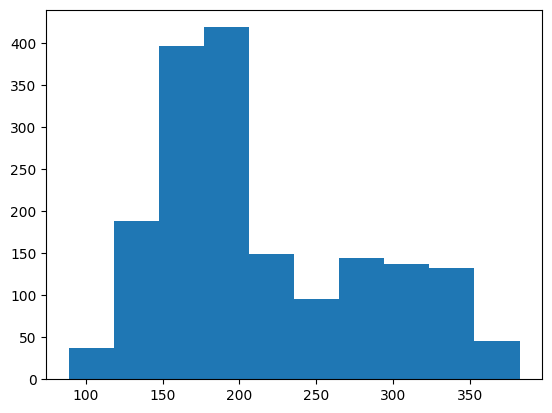

In [ ]:
import matplotlib.pyplot as plt

# bimodal (with two peaks)
plt.hist(data)

In [ ]:
data = data.to_frame()

<Axes: xlabel='Date'>

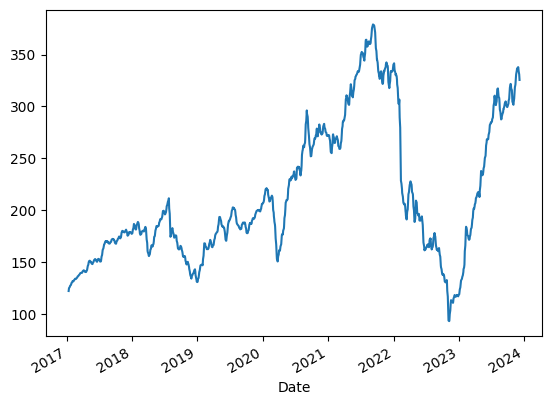

In [ ]:
data['7_dayMA'] = data['Adj Close'].rolling(window=7).mean()
data['7_dayMA'].plot()

In [ ]:
data.head(20)

,Adj Close,7_dayMA
Date,,
2017-01-03,116.860001,NaN
2017-01-04,118.690002,NaN
2017-01-05,120.669998,NaN
2017-01-06,123.410004,NaN
2017-01-09,124.900002,NaN
2017-01-10,124.349998,NaN
2017-01-11,126.089996,122.138572
2017-01-12,126.620003,123.532858
2017-01-13,128.339996,124.911428


<Axes: xlabel='Date'>

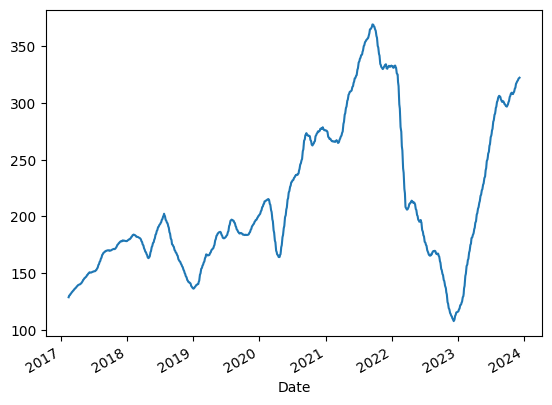

In [ ]:
data['30_dayMA'] = data['Adj Close'].rolling(window=30).mean()
data['30_dayMA'].plot()

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data

,Adj Close,7_dayMA,30_dayMA
Date,,,
2017-01-03,116.860001,NaN,NaN
2017-01-04,118.690002,NaN,NaN
2017-01-05,120.669998,NaN,NaN
2017-01-06,123.410004,NaN,NaN
2017-01-09,124.900002,NaN,NaN
...,...,...,...
2023-11-30,327.149994,335.677146,321.158333
2023-12-01,324.820007,333.940002,321.558667
2023-12-04,320.019989,330.872859,321.937667


In [ ]:
seasonal_df = data.pivot_table(values='Adj Close', aggfunc='mean', index=data.index.month, columns=data.index.year)

<Axes: xlabel='Date'>

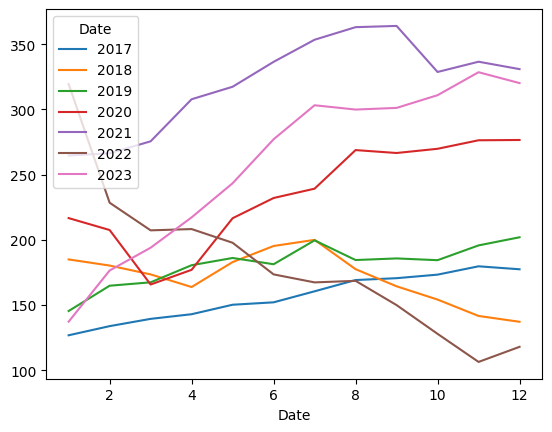

In [ ]:
seasonal_df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

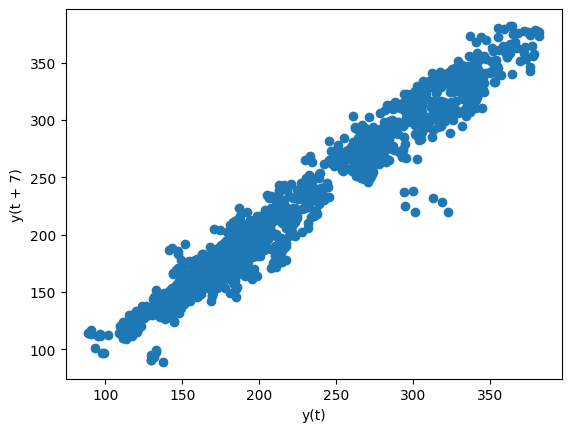

In [ ]:
# autocorrelation plot

pd.plotting.lag_plot(data['Adj Close'], lag=7)

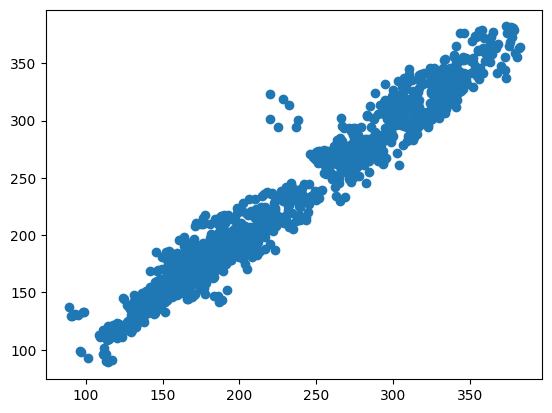

In [ ]:
# same can be plot using plt
data['7_day_lag'] = data['Adj Close'].shift(7)
plt.scatter(data['Adj Close'], data['7_day_lag'])

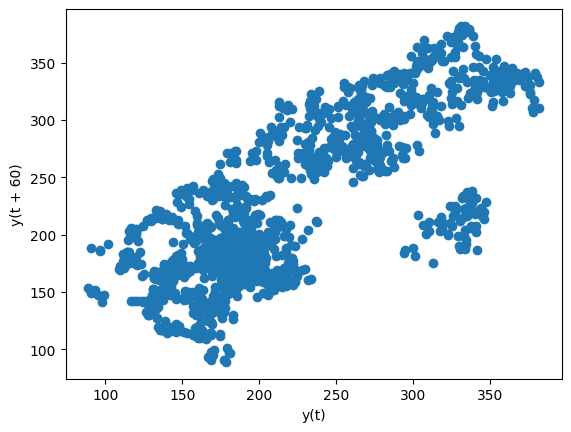

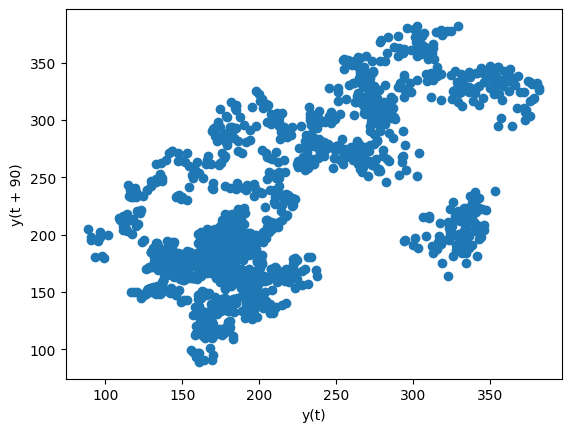

In [ ]:
# 90 days is very week, no clear relationship, better relationship if the industry is stable, e.g. banks

pd.plotting.lag_plot(data['Adj Close'], lag=60)
plt.show()
pd.plotting.lag_plot(data['Adj Close'], lag=90)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

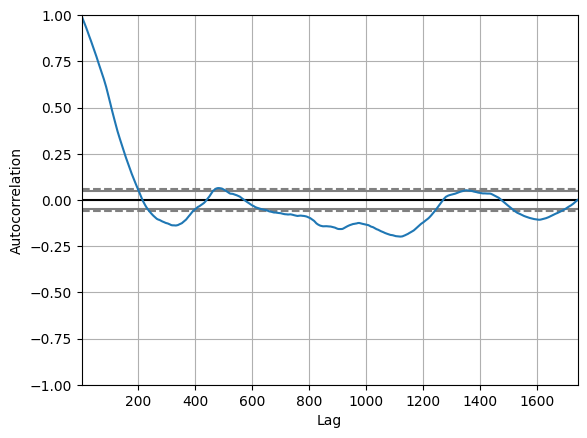

In [ ]:
pd.plotting.autocorrelation_plot(data['Adj Close'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
decomposed = seasonal_decompose(data['Adj Close'], model = 'additive', period = 365)
# additive vs multiplicative => type of seasonal component
# just different formula (linear vs multiplying)
#Y= T(trend) + S(trend)+R(residual)
#Y = T*S*R

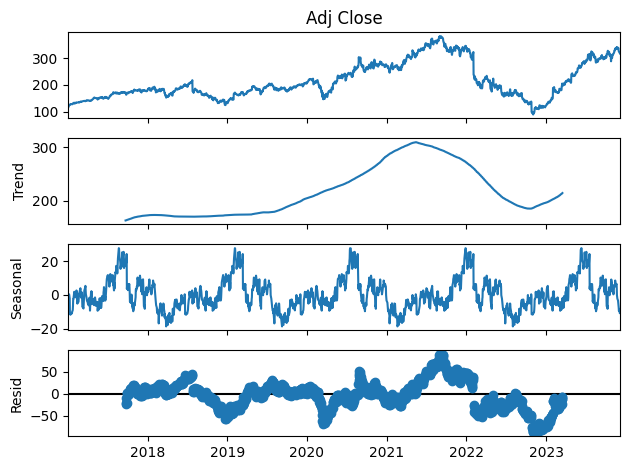

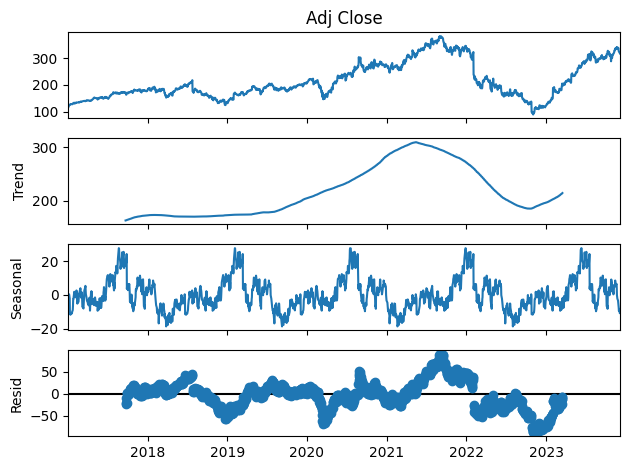

In [ ]:
decomposed.plot()

#first plot being the actual price trends
#second plot is the overall trend
#third plot is the periodic fluctuation in regular interval
#forth plot is the random variation of the data, ideally should have no residual

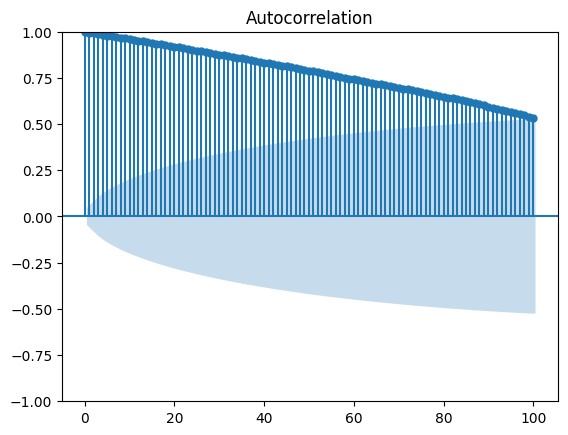

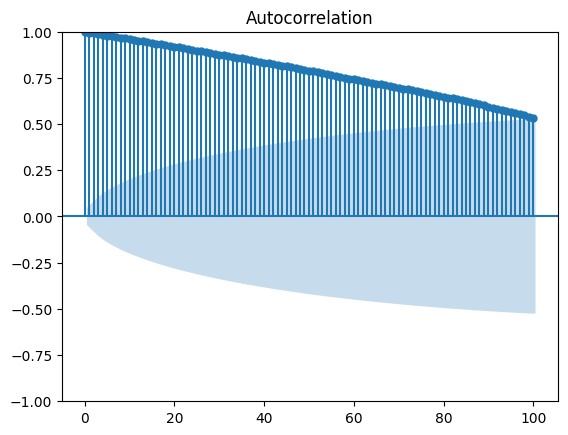

In [ ]:
# any bar above the shading is considered as statistically significant
plot_acf(data['Adj Close'], lags=100)

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
arima_model = auto_arima(data['Adj Close'], start_p=1, start_q=1, max_p=5
                         , max_q=5
                         , d=None
                         ,trace=True
                         , test='adf'
                         , error_action='ignore'
                         , suppress_warnings=True
                         , stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10841.828, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10842.043, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10841.196, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10841.282, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10840.829, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.857 seconds


In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1744
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5419.414
Date:                Fri, 08 Dec 2023   AIC                          10840.829
Time:                        21:56:26   BIC                          10846.292
Sample:                             0   HQIC                         10842.849
                               - 1744                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        29.3896      0.217    135.313      0.000      28.964      29.815
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):            119262.13
Prob(Q):                              0.09   Pr

In [ ]:
arima_model = auto_arima(data['Adj Close']
                         , start_p=1
                         , start_q=1
                         , max_p=3
                         , max_q=3
                         , m=12
                         , seasonal = False
                         , d=1
                         , start_P=0
                         , D=0
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)

Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10841.828, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10842.043, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10841.196, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10841.282, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10840.829, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.381 seconds


In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1744
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5419.414
Date:                Fri, 08 Dec 2023   AIC                          10840.829
Time:                        21:56:29   BIC                          10846.292
Sample:                             0   HQIC                         10842.849
                               - 1744                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        29.3896      0.217    135.313      0.000      28.964      29.815
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):            119262.13
Prob(Q):                              0.09   Pr

In [ ]:
arima_model.predict(n_periods=180)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1744    317.450012
1745    317.450012
1746    317.450012
1747    317.450012
1748    317.450012
           ...    
1919    317.450012
1920    317.450012
1921    317.450012
1922    317.450012
1923    317.450012
Length: 180, dtype: float64

In [ ]:
data['30_day_lag'] = data['Adj Close'].shift(30)

In [ ]:
data = data[['7_day_lag','30_day_lag','Adj Close']].dropna()

In [ ]:
data

,7_day_lag,30_day_lag,Adj Close
Date,,,
2017-02-15,132.059998,116.860001,133.440002
2017-02-16,131.839996,118.690002,133.839996
2017-02-17,134.199997,120.669998,133.529999
2017-02-21,134.139999,123.410004,133.720001
2017-02-22,134.190002,124.900002,136.119995
...,...,...,...
2023-11-30,339.970001,316.970001,327.149994
2023-12-01,336.980011,312.809998,324.820007
2023-12-04,341.489990,308.649994,320.019989


In [ ]:
y = data['Adj Close']
X = data[['7_day_lag','30_day_lag']]

In [ ]:
len(X)

1714

In [ ]:
x_train, x_test = X.iloc[:1500], X.iloc[1500:]
y_train, y_test = y.iloc[:1500], y.iloc[1500:]

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50)

In [ ]:
pred = rf_model.predict(x_test)

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(pred, y_test))

17.532344970298332